In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [3]:
num_classes = 81
image_dimension = 32
batch_size = 128

In [4]:
TRAIN_DIR = os.getcwd() + '\\dataset\\train'
VALIDATION_DIR =os.getcwd() + '\\dataset\\validation'

In [5]:
TRAIN_DIR, VALIDATION_DIR

('C:\\StudyFast\\EpicDL\\dataset\\train',
 'C:\\StudyFast\\EpicDL\\dataset\\validation')

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(image_dimension, image_dimension),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(image_dimension, image_dimension),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(
    image_dimension, image_dimension, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

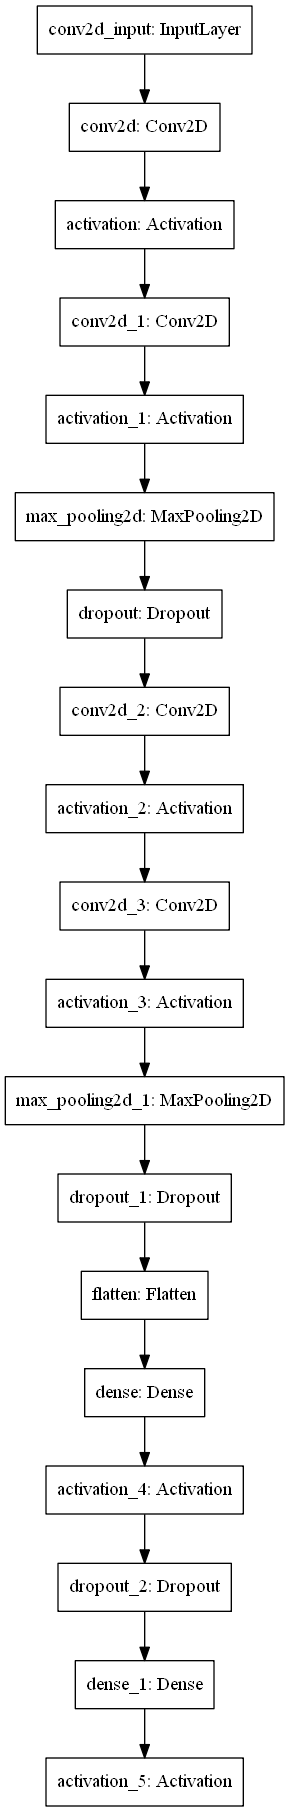

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [10]:
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

nb_train_samples = 41322
nb_validation_samples = 13877
epochs = 10

In [11]:
checkpoint = ModelCheckpoint(os.getcwd() + "\\Trained Models\\fruits_fresh_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log_dir\\model', histogram_freq=1)

callbacks = [earlystop, checkpoint, tensorboard_callback]

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
321/322 [============================>.] - ETA: 0s - loss: 2.6747 - accuracy: 0.2368
Epoch 00001: val_loss improved from inf to 1.13010, saving model to C:\StudyFast\EpicDL\Trained Models\fruits_fresh_cnn_1.h5
322/322 [==============================] - 89s 278ms/step - loss: 2.6708 - accuracy: 0.2376 - val_loss: 1.1301 - val_accuracy: 0.6301
Epoch 2/10
321/322 [============================>.] - ETA: 0s - loss: 1.2193 - accuracy: 0.5965 - ETA:  - ETA - ETA: 40s - loss: 1. - ETA: 35s - loss: 1.4352 - accuracy: - ETA: 34s - loss: 1 - ETA: 29s - loss: 1.3905 -  - ETA: 26s - loss: 1.3687 - accurac -
Epoch 00002: val_loss improved from 1.13010 to 0.87402, saving model to C:\StudyFast\EpicDL\Trained Models\fruits_fresh_cnn_1.h5
322/322 [==============================] - 76s 237ms/step - loss: 1.2203 - accuracy: 0.5962 - val_loss: 0.8740 - val_accuracy: 0.6903
Epoch 3/10
321/322 [============================>.] - ETA: 0s - loss: 0.7730 - accuracy: 0.7440 - ETA: 54s - loss: 1.0047 - 

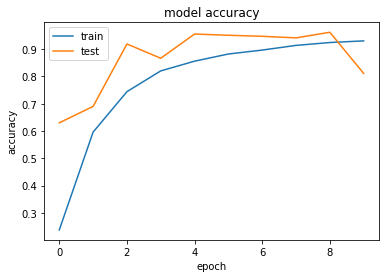

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

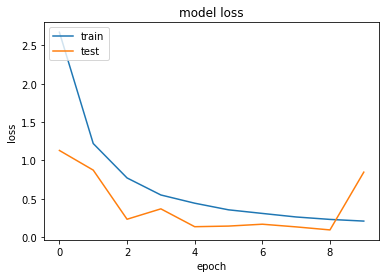

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.getcwd() + "\\Trained Models\\fruits_fresh_cnn_1.h5")

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Confution Matrix and Classification Report
Y_pred = loaded_model.predict_generator(
    validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

class_labels = {v: k for k, v in validation_generator.class_indices.items()}

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes,
                            y_pred, target_names=target_names))

Confusion Matrix
[[128   0   0 ...   0   0   0]
 [  0 156   0 ...   0   0   0]
 [  0   0 142 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.81      0.78      0.80       164
     Apple Golden 1       0.93      0.95      0.94       164
     Apple Golden 2       0.99      0.87      0.93       164
     Apple Golden 3       0.86      0.86      0.86       161
 Apple Granny Smith       1.00      1.00      1.00       164
        Apple Red 1       1.00      1.00      1.00       164
        Apple Red 2       1.00      0.91      0.95       164
        Apple Red 3       1.00      1.00      1.00       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       0.96      1.00      0.98       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      

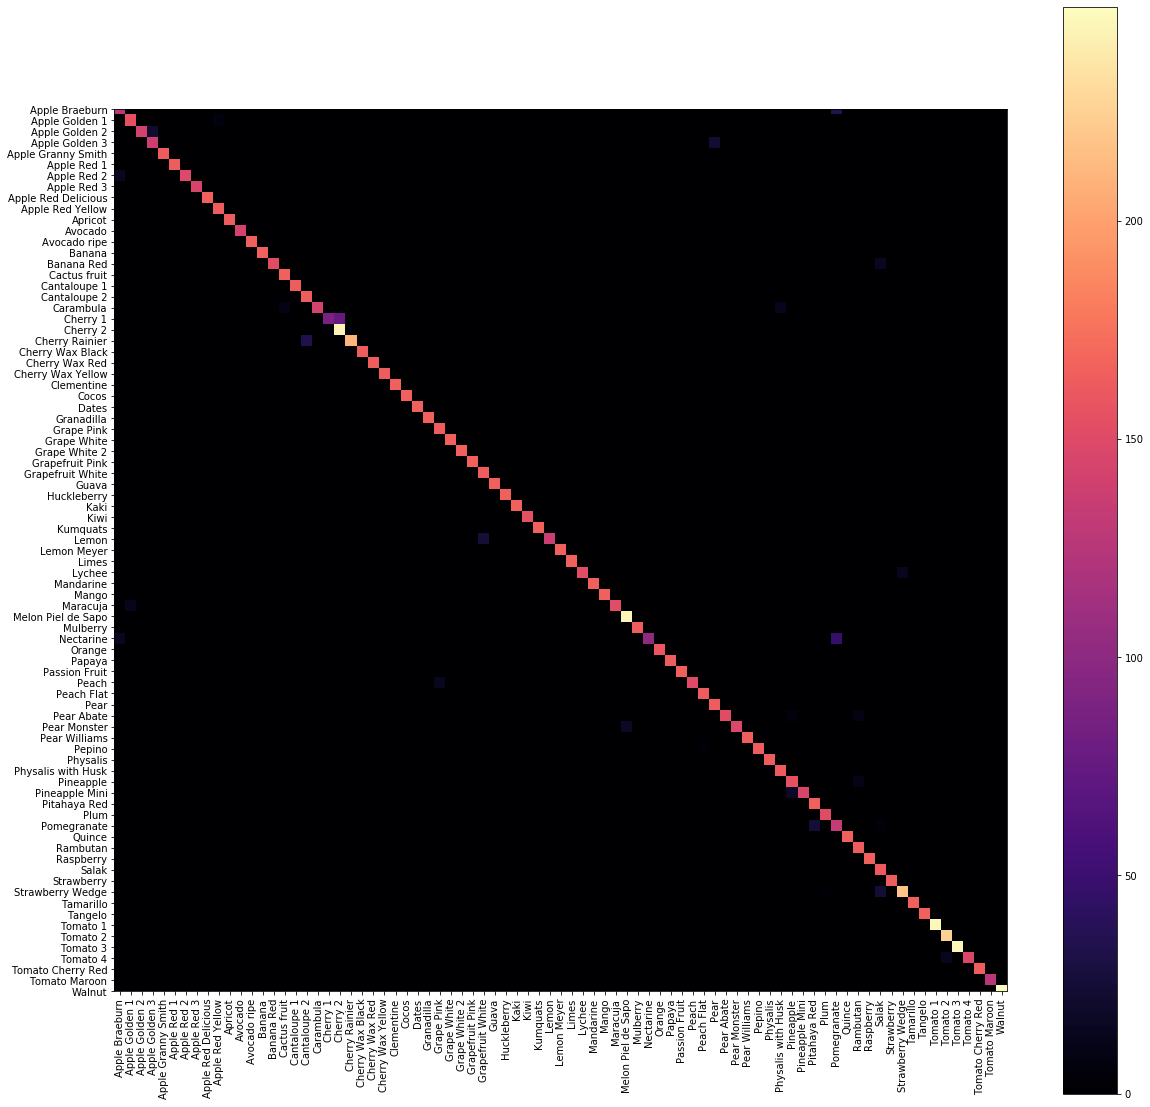

In [17]:
import numpy as np

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
plt.imshow(cnf_matrix, interpolation='nearest', cmap = "magma")
plt.colorbar()

classes = list(class_labels.values())

tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [18]:
from os import listdir
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

path = VALIDATION_DIR

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

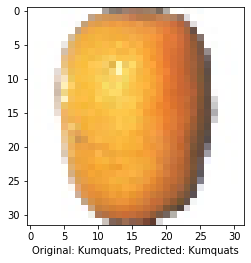

 10%|████████▎                                                                          | 1/10 [00:00<00:04,  2.15it/s]

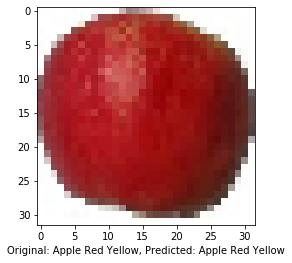

 20%|████████████████▌                                                                  | 2/10 [00:00<00:02,  2.71it/s]

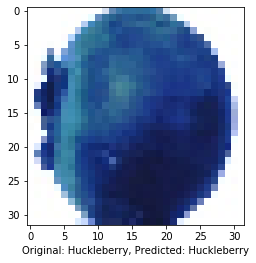

 30%|████████████████████████▉                                                          | 3/10 [00:00<00:02,  3.31it/s]

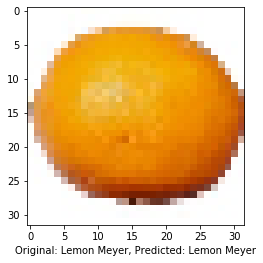

 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:01,  3.81it/s]

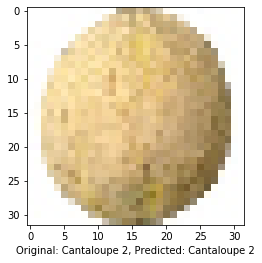

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  4.20it/s]

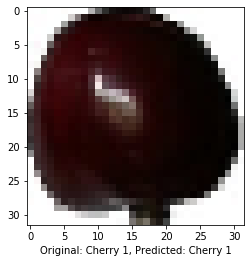

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:00,  4.78it/s]

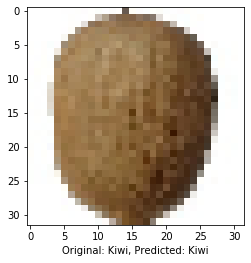

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  5.22it/s]

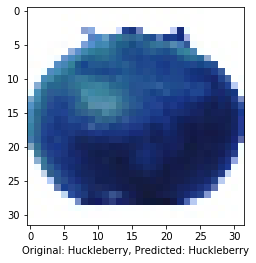

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  5.55it/s]

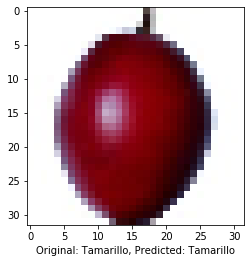

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:01<00:00,  5.92it/s]

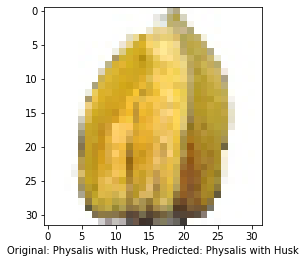

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.39it/s]


In [20]:
for i in tqdm(range(10)):
    fruit_names = os.listdir(path)
    fruit_names_folders = os.listdir(path)
    random_fruit_index = np.random.randint(0,len(fruit_names))
    fruit_name = fruit_names_folders[random_fruit_index]

    fruit_images_path = path + '\\' + fruit_name
    fruit_images = os.listdir(fruit_images_path)
    random_fruit_image_index = np.random.randint(0,len(fruit_images))
    fruit_image = fruit_images[random_fruit_image_index]
    fruit_image_path = fruit_images_path + '\\' + fruit_image
    
    result_image_array = image.img_to_array(image.load_img(fruit_image_path, target_size = (image_dimension, image_dimension)))
    normalized_result = result_image_array * 1./255
    expanded_result = np.expand_dims(normalized_result, axis=0)
    classes = loaded_model.predict_classes(expanded_result, batch_size = 10)
    predicted_label = class_labels[classes[0]]
    
    plt.imshow(image.load_img(fruit_image_path, target_size = (image_dimension, image_dimension)))
    plt.xlabel('Original: {}, Predicted: {}'.format(fruit_name, predicted_label))
    plt.show()